# **Plant Disease Classification**

# **Importam biblioteci**


*   Numpy
*   Pickle
*   CV2
*   Os
*   Matplotlib


In [125]:
#importam librariile
import numpy as np
import pickle
import cv2
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import sklearn.metrics as metrics

from os import listdir
from keras.layers import Input
from keras.models import Sequential, load_model, Model
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam, RMSprop, SGD
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models, optimizers

# **Prelucrare Date**

In [126]:
dataset_folder = "D:/Facultate/Licenta/Licenta_VascanIoana/PlantVillage/"

print(dataset_folder)

D:/Facultate/Licenta/Licenta_VascanIoana/PlantVillage/


In [127]:
sample_class = 39
class_name_train = []
class_name_val = []

dataset_folder_train = f"{dataset_folder}/{'train'}/"
for folder in os.listdir(dataset_folder_train):
    if len(os.listdir(os.path.join(dataset_folder_train, folder))) >= sample_class:
        class_name_train.append(folder)

dataset_folder_val = f"{dataset_folder}/{'val'}/"
for folder in os.listdir(dataset_folder_val):
    if len(os.listdir(os.path.join(dataset_folder_val, folder))) >= sample_class:
        class_name_val.append(folder)

In [128]:
image_list = []
label_list = []

print(f"[INFO] Processing train...")
for folder in class_name_train:
    print(f"[INFO] Processing {folder}...")
    plant_disease_image_list = listdir(f"{dataset_folder_train}/{folder}/")
    
    for image in plant_disease_image_list:
        image_directory = f"{dataset_folder_train}/{folder}/{image}"
        image_list.append(image_directory)
        label_list.append(folder)

print(f"[INFO] Processing val...")
for folder in class_name_val:
    print(f"[INFO] Processing {folder}...")
    plant_disease_image_list = listdir(f"{dataset_folder_val}/{folder}/")
    
    for image in plant_disease_image_list:
        image_directory = f"{dataset_folder_val}/{folder}/{image}"
        image_list.append(image_directory)
        label_list.append(folder)

[INFO] Processing train...
[INFO] Processing Apple___Apple_scab...
[INFO] Processing Apple___Black_rot...
[INFO] Processing Apple___Cedar_apple_rust...
[INFO] Processing Apple___healthy...
[INFO] Processing background...
[INFO] Processing Blueberry___healthy...
[INFO] Processing Cherry_(including_sour)___healthy...
[INFO] Processing Cherry_(including_sour)___Powdery_mildew...
[INFO] Processing Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot...
[INFO] Processing Corn_(maize)___Common_rust_...
[INFO] Processing Corn_(maize)___healthy...
[INFO] Processing Corn_(maize)___Northern_Leaf_Blight...
[INFO] Processing Grape___Black_rot...
[INFO] Processing Grape___Esca_(Black_Measles)...
[INFO] Processing Grape___healthy...
[INFO] Processing Grape___Leaf_blight_(Isariopsis_Leaf_Spot)...
[INFO] Processing Orange___Haunglongbing_(Citrus_greening)...
[INFO] Processing Peach___Bacterial_spot...
[INFO] Processing Peach___healthy...
[INFO] Processing Pepper,_bell___Bacterial_spot...
[INFO] Processi

In [129]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  zoom_range=0.15,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.15)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [130]:
train_generator = train_datagen.flow_from_directory(dataset_folder + '/train',
                                                    target_size=(100, 100),
                                                    batch_size=32,
                                                    shuffle=True,
                                                    class_mode='categorical')
test_generator = test_datagen.flow_from_directory(dataset_folder + '/val',
                                                  target_size=(100, 100),
                                                  batch_size=32,
                                                  shuffle=False,
                                                  class_mode='categorical')

Found 44016 images belonging to 39 classes.
Found 11004 images belonging to 39 classes.


# **Construim Modelul**

Model 1 - **Basic**

In [131]:
EPOCHS = 100
BATCH_SIZE = 32
DEPTH = 3
WEIDTH = 100
HEIGHT = 100

In [132]:
inputShape = (HEIGHT, WEIDTH, DEPTH)
chanDim = -1

if K.image_data_format() == "channels_first":
    inputShape = (DEPTH, HEIGHT, WEIDTH)
    chanDim = 1
    
if chanDim == 1:
    print('Imaginile sunt de forma (3, 100, 100)')
else:
    print('Imaginile sunt de forma (100, 100, 3)')

Imaginile sunt de forma (100, 100, 3)


In [33]:
model_1 = Sequential()

model_1.add(Conv2D(32, (3, 3), padding="same",input_shape=inputShape))
model_1.add(Activation("relu"))
model_1.add(BatchNormalization(axis=chanDim))
model_1.add(MaxPooling2D(pool_size=(3, 3)))
model_1.add(Dropout(0.25))

model_1.add(Conv2D(64, (3, 3), padding="same"))
model_1.add(Activation("relu"))
model_1.add(BatchNormalization(axis=chanDim))

model_1.add(Conv2D(64, (3, 3), padding="same"))
model_1.add(Activation("relu"))
model_1.add(BatchNormalization(axis=chanDim))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

model_1.add(Conv2D(128, (3, 3), padding="same"))
model_1.add(Activation("relu"))
model_1.add(BatchNormalization(axis=chanDim))

model_1.add(Conv2D(128, (3, 3), padding="same"))
model_1.add(Activation("relu"))
model_1.add(BatchNormalization(axis=chanDim))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

model_1.add(Flatten())
model_1.add(Dense(1024))
model_1.add(Activation("relu"))
model_1.add(BatchNormalization())
model_1.add(Dropout(0.5))
model_1.add(Dense(39))
model_1.add(Activation("softmax"))

model_1.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 100, 100, 32)      896       
_________________________________________________________________
activation_35 (Activation)   (None, 100, 100, 32)      0         
_________________________________________________________________
batch_normalization_30 (Batc (None, 100, 100, 32)      128       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 33, 33, 32)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 33, 33, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 33, 33, 64)        18496     
_________________________________________________________________
activation_36 (Activation)   (None, 33, 33, 64)       

# Antrenare Model 1

In [39]:
# Initializam optimizatorul
opt = Adam(learning_rate = 1e-3)

In [98]:
# Initializam optimizatorul
opt = SGD(learning_rate = 1e-3)

In [ ]:
# Initializam optimizatorul
opt = RMSprop(learning_rate = 1e-4)

In [99]:
# Compilam modelul
model_1.compile(loss='categorical_crossentropy', 
              optimizer=opt, 
              metrics=["accuracy"])

In [100]:
# Train model
print("[INFO] Training network...")
H = model_1.fit_generator(train_generator, 
                          steps_per_epoch = 44016 // BATCH_SIZE, 
                          epochs = EPOCHS, 
                          validation_data = test_generator, 
                          validation_steps = 11004 // BATCH_SIZE)

[INFO] Training network...
Epoch 1/100
1375/1375 [==============================] - 2827s 2s/step - loss: 3.4389 - accuracy: 0.2540 - val_loss: 2.0387 - val_accuracy: 0.4821
Epoch 2/100
1375/1375 [==============================] - 1770s 1s/step - loss: 1.8576 - accuracy: 0.5149 - val_loss: 1.0755 - val_accuracy: 0.6842
Epoch 3/100
1375/1375 [==============================] - 2249s 2s/step - loss: 1.5006 - accuracy: 0.5892 - val_loss: 1.1912 - val_accuracy: 0.6607
Epoch 4/100
1375/1375 [==============================] - 2004s 1s/step - loss: 1.2994 - accuracy: 0.6311 - val_loss: 1.3258 - val_accuracy: 0.6496
Epoch 5/100
1375/1375 [==============================] - 2499s 2s/step - loss: 1.1580 - accuracy: 0.6656 - val_loss: 3.6633 - val_accuracy: 0.3989
Epoch 6/100
1375/1375 [==============================] - 2312s 2s/step - loss: 1.0512 - accuracy: 0.6916 - val_loss: 1.4240 - val_accuracy: 0.6402
Epoch 7/100
1375/1375 [==============================] - 2747s 2s/step - loss: 0.9494 - acc

Model 2 - **ResNet50**

In [133]:
resnet_base = ResNet50(weights='imagenet', 
                       include_top=False, 
                       input_shape=inputShape)

resnet_base.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 106, 106, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 50, 50, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 50, 50, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

conv4_block2_add (Add)          (None, 7, 7, 1024)   0           conv4_block1_out[0][0]           
                                                                 conv4_block2_3_bn[0][0]          
__________________________________________________________________________________________________
conv4_block2_out (Activation)   (None, 7, 7, 1024)   0           conv4_block2_add[0][0]           
__________________________________________________________________________________________________
conv4_block3_1_conv (Conv2D)    (None, 7, 7, 256)    262400      conv4_block2_out[0][0]           
__________________________________________________________________________________________________
conv4_block3_1_bn (BatchNormali (None, 7, 7, 256)    1024        conv4_block3_1_conv[0][0]        
__________________________________________________________________________________________________
conv4_block3_1_relu (Activation (None, 7, 7, 256)    0           conv4_block3_1_bn[0][0]          
__________

In [134]:
model_2 = models.Sequential()
model_2.add(resnet_base)
model_2.add(layers.Flatten())
model_2.add(layers.Dropout(0.4))
model_2.add(layers.Dense(1024, activation='relu'))
model_2.add(layers.Dense(39, activation = 'softmax'))
model_2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 4, 4, 2048)        23587712  
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
dropout (Dropout)            (None, 32768)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              33555456  
_________________________________________________________________
dense_1 (Dense)              (None, 39)                39975     
Total params: 57,183,143
Trainable params: 57,130,023
Non-trainable params: 53,120
_________________________________________________________________


In [135]:
# inghetam toate straturile
for layer in resnet_base.layers[:]:
  layer.trainable = False

model_2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 4, 4, 2048)        23587712  
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
dropout (Dropout)            (None, 32768)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              33555456  
_________________________________________________________________
dense_1 (Dense)              (None, 39)                39975     
Total params: 57,183,143
Trainable params: 33,595,431
Non-trainable params: 23,587,712
_________________________________________________________________


In [136]:
EPOCHS = 5
BATCH_SIZE = 32
DEPTH = 3
WEIDTH = 100
HEIGHT = 100

In [50]:
# Initializam optimizatorul
opt = Adam(learnimg_rate = 1e-3)

In [137]:
# Initializam optimizatorul
opt = SGD(learning_rate = 1e-3)

In [13]:
# Initializam optimizatorul
opt = RMSprop(learning_rate = 1e-4)

In [138]:
model_2.compile(optimizer = opt,
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

In [139]:
# Train model
print("[INFO] Training network...")
H = model_2.fit_generator(train_generator, 
                          steps_per_epoch = 44016 // BATCH_SIZE, 
                          epochs = EPOCHS, 
                          validation_data = test_generator, 
                          validation_steps = 11004 // BATCH_SIZE)
                        
model_2.summary()

[INFO] Training network...


C:\Users\ioana\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
1375/1375 [==============================] - 3557s 3s/step - loss: 3.4287 - accuracy: 0.1198 - val_loss: 3.2952 - val_accuracy: 0.1380
Epoch 2/5
1375/1375 [==============================] - 2867s 2s/step - loss: 3.2753 - accuracy: 0.1458 - val_loss: 3.1847 - val_accuracy: 0.1798
Epoch 3/5
1375/1375 [==============================] - 2337s 2s/step - loss: 3.2101 - accuracy: 0.1579 - val_loss: 3.1826 - val_accuracy: 0.1818
Epoch 4/5
1375/1375 [==============================] - 2272s 2s/step - loss: 3.1680 - accuracy: 0.1663 - val_loss: 3.0824 - val_accuracy: 0.1641
Epoch 5/5
1375/1375 [==============================] - 2416s 2s/step - loss: 3.1294 - accuracy: 0.1736 - val_loss: 3.0765 - val_accuracy: 0.1814
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 4, 4, 2048)        23587712  
_________________________________________________________

In [140]:
# Dezgheţarea unor straturi ale modelului
for layer in resnet_base.layers[:165]:
  layer.trainable = False
for layer in resnet_base.layers[165:]:
  layer.trainable = True

for i, layer in enumerate(resnet_base.layers):
  print(i, layer.name, layer.trainable)

0 input_1 False
1 conv1_pad False
2 conv1_conv False
3 conv1_bn False
4 conv1_relu False
5 pool1_pad False
6 pool1_pool False
7 conv2_block1_1_conv False
8 conv2_block1_1_bn False
9 conv2_block1_1_relu False
10 conv2_block1_2_conv False
11 conv2_block1_2_bn False
12 conv2_block1_2_relu False
13 conv2_block1_0_conv False
14 conv2_block1_3_conv False
15 conv2_block1_0_bn False
16 conv2_block1_3_bn False
17 conv2_block1_add False
18 conv2_block1_out False
19 conv2_block2_1_conv False
20 conv2_block2_1_bn False
21 conv2_block2_1_relu False
22 conv2_block2_2_conv False
23 conv2_block2_2_bn False
24 conv2_block2_2_relu False
25 conv2_block2_3_conv False
26 conv2_block2_3_bn False
27 conv2_block2_add False
28 conv2_block2_out False
29 conv2_block3_1_conv False
30 conv2_block3_1_bn False
31 conv2_block3_1_relu False
32 conv2_block3_2_conv False
33 conv2_block3_2_bn False
34 conv2_block3_2_relu False
35 conv2_block3_3_conv False
36 conv2_block3_3_bn False
37 conv2_block3_add False
38 conv2_bloc

In [55]:
# Initializam optimizatorul
opt = Adam(learning_rate = 1e-3)

In [ ]:
# Initializam optimizatorul
opt = SGD(learning_rate = 1e-3)

In [141]:
# Initializam optimizatorul
opt = RMSprop(learning_rate = 1e-4)

In [142]:
model_2.compile(optimizer=opt,
              loss='categorical_crossentropy',
             metrics=['accuracy'])
model_2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 4, 4, 2048)        23587712  
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
dropout (Dropout)            (None, 32768)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              33555456  
_________________________________________________________________
dense_1 (Dense)              (None, 39)                39975     
Total params: 57,183,143
Trainable params: 38,061,095
Non-trainable params: 19,122,048
_________________________________________________________________


In [ ]:
print('Fit the model...')

EPOCHS = 100

H = model_2.fit_generator(train_generator,
                steps_per_epoch = 44016 // BATCH_SIZE,
                validation_data = test_generator,
                validation_steps = 11004 // BATCH_SIZE,
                epochs = EPOCHS,
                verbose = 1)

Fit the model...
Epoch 1/100
1375/1375 [==============================] - 3174s 2s/step - loss: 2.5857 - accuracy: 0.2949 - val_loss: 2.5744 - val_accuracy: 0.3392
Epoch 2/100
1375/1375 [==============================] - 3361s 2s/step - loss: 2.0565 - accuracy: 0.4122 - val_loss: 2.7053 - val_accuracy: 0.3483
Epoch 3/100
1375/1375 [==============================] - 3270s 2s/step - loss: 1.8363 - accuracy: 0.4655 - val_loss: 3.4596 - val_accuracy: 0.3394
Epoch 4/100
1375/1375 [==============================] - 3290s 2s/step - loss: 1.7164 - accuracy: 0.4994 - val_loss: 1.5935 - val_accuracy: 0.5420
Epoch 5/100
1375/1375 [==============================] - 3421s 2s/step - loss: 1.6159 - accuracy: 0.5237 - val_loss: 4.3088 - val_accuracy: 0.2310
Epoch 6/100
1375/1375 [==============================] - 3364s 2s/step - loss: 1.5532 - accuracy: 0.5428 - val_loss: 3.2366 - val_accuracy: 0.4103
Epoch 7/100
1375/1375 [==============================] - 3500s 3s/step - loss: 1.4962 - accuracy: 0.5

# **Evaluam Modelul**

Afisam 2 plot-uri: acuratetea si pierderea.

In [ ]:
acc = H.history['accuracy']
val_acc = H.history['val_accuracy']
loss = H.history['loss']
val_loss = H.history['val_loss']
epochs = range(1, len(acc) + 1)

# Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()

# Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [102]:
# daca am folosit Modelul 1 - Basic
model = model_1

In [83]:
# daca am folosit Modelul 2 - ResNet50
model = model_2

In [105]:
print('Validate the model')
final_result = model.evaluate(test_generator,
                                steps = 344)
print(f"Acuratetea testului: {final_result[1]*100}")

Validate the model
344/344 [==============================] - 148s 430ms/step - loss: 0.6074 - accuracy: 0.8452
Acuratetea testului: 84.52380895614624


# **Filtre**

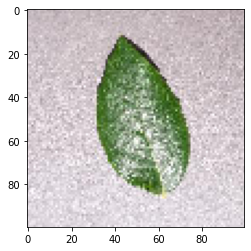

In [51]:
from keras.preprocessing import image

img1 = image.load_img('D:/Facultate/Licenta/Licenta_VascanIoana/PlantVillage/val/Blueberry___healthy/008c85d0-a954-4127-bd26-861dc8a1e6ff___RS_HL 2431.JPG', target_size = (100, 100))
plt.imshow(img1)
#img = cv2.resize(img1, tuple((100, 100)))
img = image.img_to_array(img1)
img = np.expand_dims(img, axis=0)
img = img/255

In [106]:
model_layers = [ layer.name for layer in model.layers]
print('layer name : ',model_layers)

layer name :  ['conv2d_10', 'activation_14', 'batch_normalization_12', 'max_pooling2d_6', 'dropout_8', 'conv2d_11', 'activation_15', 'batch_normalization_13', 'conv2d_12', 'activation_16', 'batch_normalization_14', 'max_pooling2d_7', 'dropout_9', 'conv2d_13', 'activation_17', 'batch_normalization_15', 'conv2d_14', 'activation_18', 'batch_normalization_16', 'max_pooling2d_8', 'dropout_10', 'flatten_2', 'dense_4', 'activation_19', 'batch_normalization_17', 'dropout_11', 'dense_5', 'activation_20']


In [109]:
# pentru Model 1
conv2d_1_output = Model(inputs=model.input, outputs=model.get_layer('conv2d_1').output)
conv2d_2_output = Model(inputs=model.input, outputs=model.get_layer('conv2d_2').output)
conv2d_3_output = Model(inputs=model.input, outputs=model.get_layer('conv2d_3').output)
conv2d_4_output = Model(inputs=model.input, outputs=model.get_layer('conv2d_4').output)

conv2d_1_features = conv2d_1_output.predict(img)
conv2d_2_features = conv2d_2_output.predict(img)
conv2d_3_features = conv2d_3_output.predict(img)
conv2d_4_features = conv2d_4_output.predict(img)

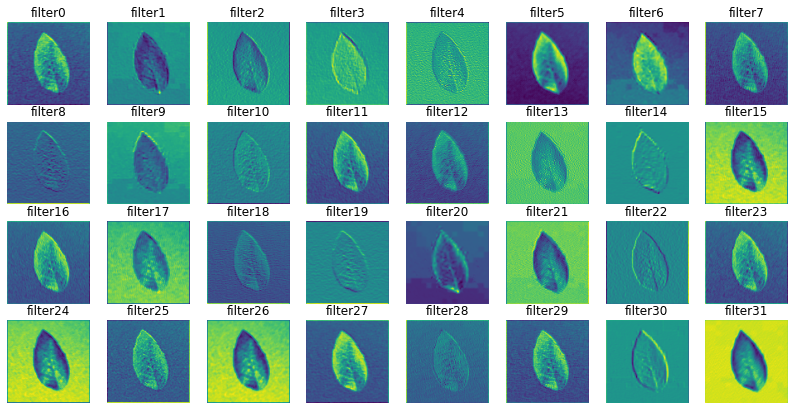

In [110]:
#afisare filtre
fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4

for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_1_features[0, :, :, i], cmap='viridis')
plt.show()

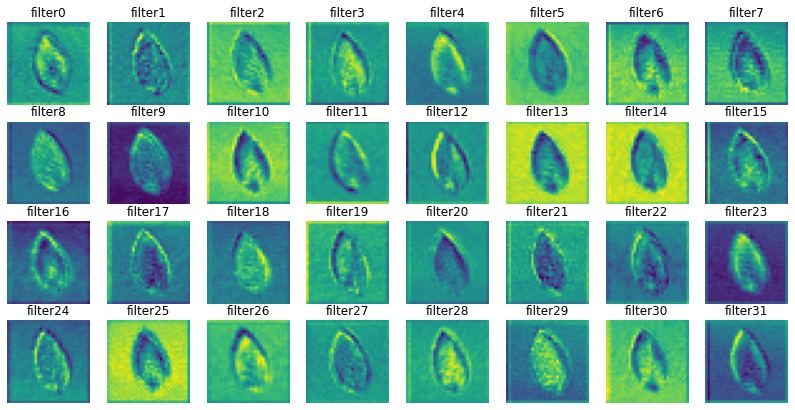

In [111]:
fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4

for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_2_features[0, :, :, i], cmap='viridis')
plt.show()

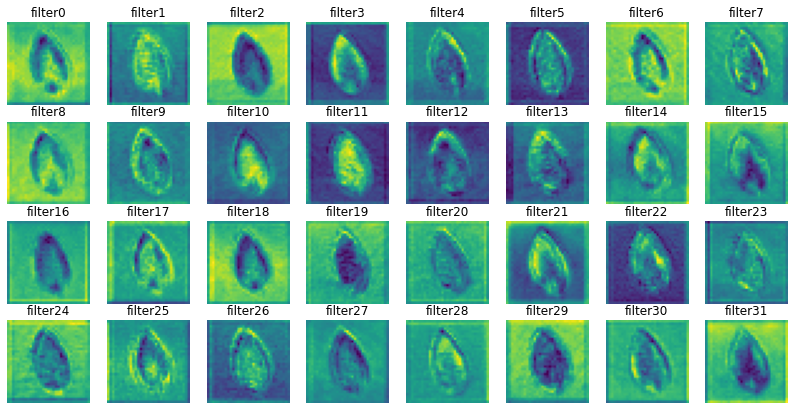

In [112]:
fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4

for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_3_features[0, :, :, i], cmap='viridis')
plt.show()

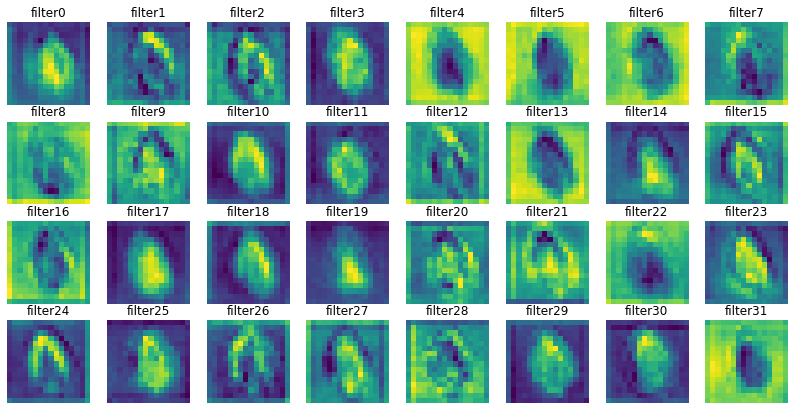

In [113]:
fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4

for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_4_features[0, :, :, i], cmap='viridis')
plt.show()

In [95]:
# pentru Model 2
model_layers = [ layer.name for layer in model.layers]
print('layer name : ',model_layers)

layer name :  ['resnet50', 'flatten_4', 'dropout_4', 'dense_8', 'dense_9']


# **Matricea de confuzie**

**Setul de test**

In [115]:
test_samples = test_predict.shape[0]
print('Number of data points in test set:',test_samples)

Number of data points in test set: 11004


In [114]:
test_predict = model.predict(test_generator,
                             steps = 344,
                             verbose = 1)

344/344 [==============================] - 192s 556ms/step


In [116]:
test_predicted_classes = np.argmax(test_predict, axis = 1)
test_true_classes = test_generator.classes
test_class_labels = list(test_generator.class_indices.keys())

In [117]:
validation_report = metrics.classification_report(test_true_classes, 
                                                  test_predicted_classes, 
                                                  target_names=test_class_labels)
print('The validation report is as follows:')
print(validation_report)

The validation report is as follows:
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.38      0.55       126
                                 Apple___Black_rot       0.74      1.00      0.85       125
                          Apple___Cedar_apple_rust       1.00      0.87      0.93        55
                                   Apple___healthy       0.67      0.94      0.78       329
                               Blueberry___healthy       0.99      0.81      0.89       300
          Cherry_(including_sour)___Powdery_mildew       1.00      0.85      0.92       210
                 Cherry_(including_sour)___healthy       0.97      0.82      0.89       170
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.76      0.87      0.81       103
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00       239
               Corn_(maize)___Northern_Lea

In [118]:
val_conf_matrix = tf.math.confusion_matrix(labels=test_true_classes, predictions=test_predicted_classes).numpy()
print(val_conf_matrix)

[[ 48   2   0 ...   0   0   0]
 [  0 125   0 ...   0   0   0]
 [  0   0  48 ...   0   0   0]
 ...
 [  0   0   0 ...  66   5   0]
 [  0   0   0 ...   0 318   0]
 [  0   0   0 ...   0   1 133]]


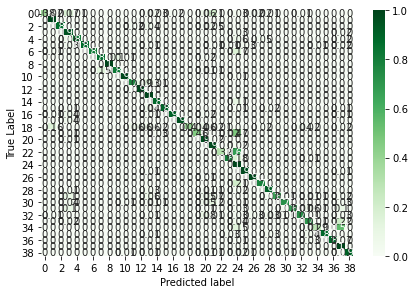

In [120]:
figure1 = plt.figure()
val_conf_matrix = np.round(val_conf_matrix.astype('float') / val_conf_matrix.sum(axis=1)[:, np.newaxis], 2)
sns.heatmap(val_conf_matrix, annot = True, cmap=plt.cm.Greens)
plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted label')
#plt.savefig('Validation data Confusion Matrix Model 1 - Adam', dpi=250)
#plt.savefig('Validation data Confusion Matrix Model 1 - SGD', dpi=250)
#plt.savefig('Validation data Confusion Matrix Model 1 - RMSprpo', dpi = 250)
#plt.savefig('Validation data Confusion Matrix Model 2- Adam', dpi=250)
#plt.savefig('Validation data Confusion Matrix Model 2 - SGD', dpi=250)
#plt.savefig('Validation data Confusion Matrix Model 2 - RMSprpo', dpi = 250)
plt.show()

# **Salvare Model**

Salvam modelul in 2 "documente":
*   "plant_disease_classification_model.h5" - pentru modelul de clasificarea a plantelor, in format .h5
*   "plant_disease_label_transform.pkl" - pentru etichete imaginilor plantelor, in format .pkl



In [1]:
# Save file of the model
#model.save("plant_disease_classification_model_1_Adam.h5")
#model.save("plant_disease_classification_model_1_SGD.h5")
model.save("plant_disease_classification_model_1_RMSprop.h5")
#model.save("plant_disease_classification_model_2_Adam.h5")
#model.save("plant_disease_classification_model_2_SGD.h5")
#model.save("plant_disease_classification_model_2_RMSprop.h5")
print("[INFO] Saving model...")

NameError: name 'model' is not defined

In [ ]:
print(test_class_labels)

pickle.dump(test_class_labels,open('plant_disease_label_transform.h5', 'wb'))
print("[INFO] Saving labels...")

# **Testare Model**

In [89]:
# Dimension of resized image
DEFAULT_IMAGE_SIZE = tuple((256, 256))

def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None:
            image = cv2.resize(image, DEFAULT_IMAGE_SIZE)   
            return img_to_array(image)
        else:
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [90]:
def predict_disease(image_path):
    image_array = convert_image_to_array(image_path)
    np_image = np.array(image_array, dtype=np.float16) / 225.0
    np_image = np.expand_dims(np_image,0)
    plt.imshow(plt.imread(image_path))
    result = model.predict_classes(np_image)
    print((test_class_labels.classes_[result[0]]))

NameError: name 'image_labels' is not defined

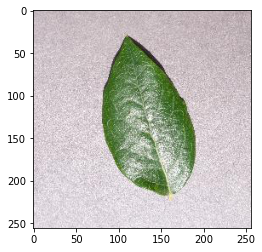

In [91]:
predict_disease('D:/Facultate/Licenta/Licenta_VascanIoana/PlantVillage/val/Blueberry___healthy/008c85d0-a954-4127-bd26-861dc8a1e6ff___RS_HL 2431.JPG')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Potato___Early_blight


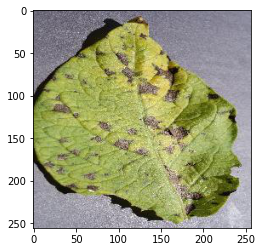

In [ ]:
predict_disease('D:/Facultate/Licenta/Licenta_VascanIoana/PlantVillage/val/Grape___Esca_(Black_Measles)/1f4911b2-05bb-4784-99cb-cb1170cf96ba___FAM_B.Msls 0938.JPG')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Cherry_(including_sour)___healthy


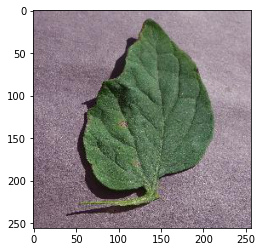

In [ ]:
predict_disease('D:/Facultate/Licenta/Licenta_VascanIoana/PlantVillage/val/Tomato___Target_Spot/1006b3dd-22d8-41b8-b83d-08bf189fcdaa___Com.G_TgS_FL 8118.JPG')

In [ ]:
predict_disease('D:/Facultate/Licenta/Licenta_VascanIoana/PlantVillage/val/Orange___Haunglongbing_(Citrus_greening)/02459e0c-a189-4dc9-a0dc-0548e36d0efb___CREC_HLB 5714.JPG')

# **Recuperare Model**

Importam librariile

In [1]:
import numpy as np
import pickle
import cv2
import os
import json
import matplotlib.pyplot as plt


from os import listdir

from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential, load_model
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from tensorflow.keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array


Incarcam modelul antrenat si labels

In [9]:
# Load model
#filename = 'D:/Facultate/Licenta/Licenta_VascanIoana/plant_disease_classification_model_1_Adam.h5'
filename = 'D:/Facultate/Licenta/Licenta_VascanIoana/plant_disease_classification_model_1_SGD.h5'
#filename = 'D:/Facultate/Licenta/Licenta_VascanIoana/plant_disease_classification_model_1_RMSprop.h5'
#filename = 'D:/Facultate/Licenta/Licenta_VascanIoana/plant_disease_classification_model_2_Adam.h5'
#filename = 'D:/Facultate/Licenta/Licenta_VascanIoana/plant_disease_classification_model_2_SGD.h5'
#filename = 'D:/Facultate/Licenta/Licenta_VascanIoana/plant_disease_classification_model_2_RMSprop.h5'
model = load_model(filename)

# Load labels
labels = 'D:/Facultate/Licenta/Licenta_VascanIoana/plant_disease_label_transform.h5'
test_class_labels = pickle.load(open(labels, 'rb'))

In [10]:
# Dimension of resized image
DEFAULT_IMAGE_SIZE = tuple((100, 100))

def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None:
            image = cv2.resize(image, DEFAULT_IMAGE_SIZE)   
            return img_to_array(image)
        else:
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

def predict_disease(image_path):
    image_array = convert_image_to_array(image_path)
    np_image = np.array(image_array, dtype=np.float16) / 225.0
    np_image = np.expand_dims(np_image,0)
    plt.imshow(plt.imread(image_path))
    result = model.predict_classes(np_image)
    print((test_class_labels[result[0]]))

Grape___Esca_(Black_Measles)


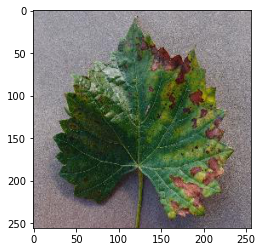

In [11]:
predict_disease('D:/Facultate/Licenta/Licenta_VascanIoana/PlantVillage/val/Grape___Esca_(Black_Measles)/3d5bea0c-0fa4-4335-8b33-dddb18b5cf09___FAM_B.Msls 1740.JPG')

Grape___Esca_(Black_Measles)


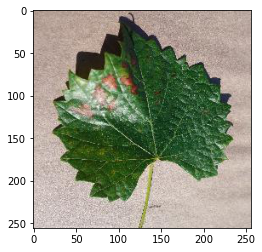

In [12]:
predict_disease('D:/Facultate/Licenta/Licenta_VascanIoana/PlantVillage/val/Grape___Esca_(Black_Measles)/1f4911b2-05bb-4784-99cb-cb1170cf96ba___FAM_B.Msls 0938.JPG')

Corn_(maize)___healthy


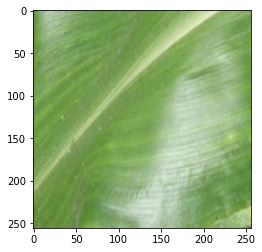

In [13]:
predict_disease('D:/Facultate/Licenta/Licenta_VascanIoana/PlantVillage/val/Corn_(maize)___healthy/0af3d913-471e-4769-9372-e0af517ba507___R.S_HL 5524 copy 2.JPG')

Corn_(maize)___healthy


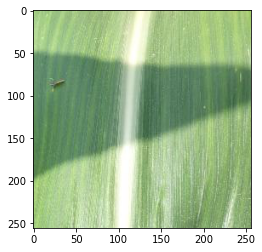

In [6]:
predict_disease('D:/Facultate/Licenta/Licenta_VascanIoana/PlantVillage/val/Corn_(maize)___healthy/0d61ead9-f316-408e-88f5-fbecdfb11c1a___R.S_HL 8324 copy 3.JPG')

Blueberry___healthy


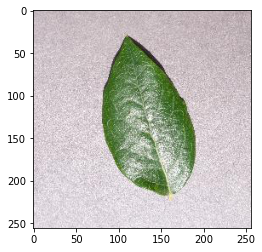

In [7]:
predict_disease('D:/Facultate/Licenta/Licenta_VascanIoana/PlantVillage/val/Blueberry___healthy/008c85d0-a954-4127-bd26-861dc8a1e6ff___RS_HL 2431.JPG')

Blueberry___healthy


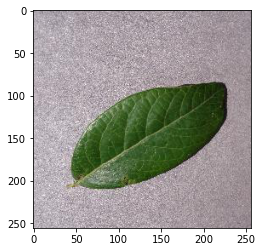

In [8]:
predict_disease('D:/Facultate/Licenta/Licenta_VascanIoana/PlantVillage/val/Blueberry___healthy/2d8540de-c3db-497b-bbce-c49a561426d8___RS_HL 2293.JPG')